In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
tickers = ['^DJI', '^GSPC', '^IXIC']

# Download adjusted close price data for each ticker
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t] = yf.download(t, start='2000-1-1')['Adj Close']

/Users/georgespyros/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/georgespyros/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/georgespyros/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[***

In [3]:
ind_data.head()

,^DJI,^GSPC,^IXIC
Date,,,
2000-01-03,11357.509766,1455.219971,4131.149902
2000-01-04,10997.929688,1399.420044,3901.689941
2000-01-05,11122.650391,1402.109985,3877.540039
2000-01-06,11253.259766,1403.449951,3727.129883
2000-01-07,11522.559570,1441.469971,3882.620117


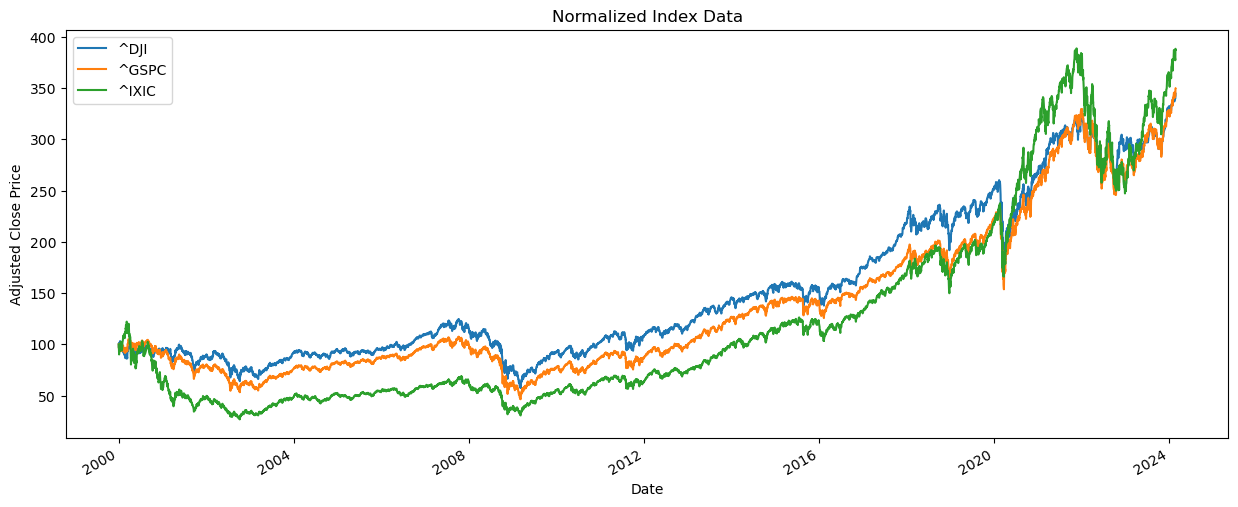

In [4]:
# Plot normalized index data
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15, 6))
plt.title('Normalized Index Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [5]:
# Calculate daily returns for each index
ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns

,^DJI,^GSPC,^IXIC
Date,,,
2000-01-03,NaN,NaN,NaN
2000-01-04,-0.031660,-0.038345,-0.055544
2000-01-05,0.011340,0.001922,-0.006190
2000-01-06,0.011743,0.000956,-0.038790
2000-01-07,0.023931,0.027090,0.041718
...,...,...,...
2024-02-16,-0.003743,-0.004803,-0.008206
2024-02-20,-0.001662,-0.006005,-0.009183
2024-02-21,0.001256,0.001264,-0.003193


In [6]:
# Calculate annualized returns for each index
annual_ind_returns = ind_returns.mean() * 252

In [7]:
# Calculate volatility (standard deviation of returns) for each index
volatility = ind_returns.std() * np.sqrt(252)

In [8]:
# annual_ind_returns and volatility table
result = pd.DataFrame({
    'Volatility': volatility,
    'Annualized Returns': annual_ind_returns})

result 

,Volatility,Annualized Returns
^DJI,0.186366,0.068729
^GSPC,0.195840,0.071164
^IXIC,0.251390,0.087781
